使用pandas的agg方法可以做很多文本分析的操作

In [1]:
import pandas as pd

df = pd.read_csv('data/excel/sentimentexcell.csv', encoding='gbk')
df

,name,text,age,gender
0,张三姐,我很开心，每天都这么快乐，我很幸福,20,female
1,李四姐,我很难过,30,female
2,王五哥,唉，真难受,22,male
3,赵六兄弟,无所谓开心还是难过,14,male
4,凯哥,每天赚一万，真爽！,22,male
5,八戒,爽歪歪,38,male
6,孙悟空,天气很凉爽，很舒服,11,male
7,白骨精,每天开心,44,female
8,武媚娘,难过悲伤,32,female
9,不知道起什么名字了,美满幸福,52,male


### 读取词典，返回词语列表

In [2]:
def read_dict(file, encoding):
    text = open(file, 'r', encoding=encoding).read()
    wordlist = text.split('\n')
    wordlist = [w for w in wordlist if w]
    return wordlist

read_dict('data/excel/positive.txt', encoding='gbk')

['开心', '快乐', '幸福', '爽', '舒服', '美满', '幸福美满']

### 自定义情感计算函数

In [4]:
import jieba

def sentiment(text):
    #情感词语计数
    pos_num = 0
    neg_num = 0
    
    #导入情感词典
    positives = read_dict('data/excel/positive.txt', encoding='gbk')
    negatives = read_dict('data/excel/negative.txt', encoding='gbk')
    
    #对待分析文本进行分词
    wordlist = jieba.lcut(text)

    #判断词语类别。正面、负面、中性
    for word in wordlist:
        if word in positives:
            pos_num = pos_num + 1
        elif word in negatives:
            neg_num = neg_num + 1
        else:
            #中性词
            pass
    
    #最后判断句子的情感极性（方向）
    if pos_num > neg_num:
        return 'Pos'
    elif pos_num < neg_num:
        return 'Neg'
    else:
        return 'Neo'  

In [5]:
test1 = '我很开心美满快乐幸福'
sentiment(test1)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/4m/fdp9_6v153z7j6q533c5cmn40000gp/T/jieba.cache
Loading model cost 0.607 seconds.
Prefix dict has been built succesfully.


'Pos'

In [6]:
test2 = '我很难过悲伤'
sentiment(test2)

'Neg'

### 使用df.agg方法批量计算

In [7]:
df.agg({'text': [sentiment]})

,text
,sentiment
0,Pos
1,Neg
2,Neg
3,Neo
4,Neo
5,Neo
6,Pos
7,Pos
8,Neg


df没有发生变化

In [8]:
df

,name,text,age,gender
0,张三姐,我很开心，每天都这么快乐，我很幸福,20,female
1,李四姐,我很难过,30,female
2,王五哥,唉，真难受,22,male
3,赵六兄弟,无所谓开心还是难过,14,male
4,凯哥,每天赚一万，真爽！,22,male
5,八戒,爽歪歪,38,male
6,孙悟空,天气很凉爽，很舒服,11,male
7,白骨精,每天开心,44,female
8,武媚娘,难过悲伤,32,female
9,不知道起什么名字了,美满幸福,52,male


### 将情感分析结果存到senti列（新列）

In [9]:
df['senti'] = df.agg({'text': [sentiment]})
df.to_csv('output/outout_sentimentexcell.csv', encodinng='gbk')

,name,text,age,gender,senti
0,张三姐,我很开心，每天都这么快乐，我很幸福,20,female,Pos
1,李四姐,我很难过,30,female,Neg
2,王五哥,唉，真难受,22,male,Neg
3,赵六兄弟,无所谓开心还是难过,14,male,Neo
4,凯哥,每天赚一万，真爽！,22,male,Neo
5,八戒,爽歪歪,38,male,Neo
6,孙悟空,天气很凉爽，很舒服,11,male,Pos
7,白骨精,每天开心,44,female,Pos
8,武媚娘,难过悲伤,32,female,Neg
9,不知道起什么名字了,美满幸福,52,male,Neo


### 性别与情感的分布
使用groupby看看性别与态度的分布

In [11]:
df.groupby('gender').senti.value_counts(normalize=True)

gender  senti
female  Neg      0.500000
        Pos      0.500000
male    Neo      0.666667
        Neg      0.166667
        Pos      0.166667
Name: senti, dtype: float64

### 画图

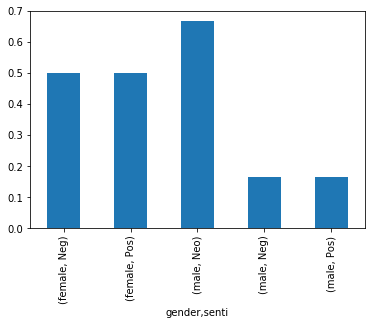

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

df.groupby('gender').senti.value_counts(normalize=True).plot(kind='bar')

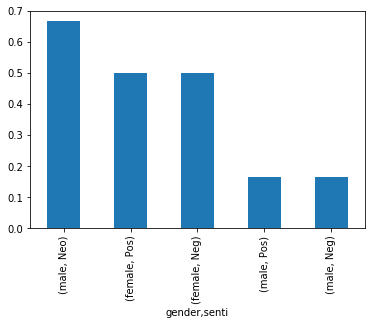

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt

#排序后
df.groupby('gender').senti.value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')

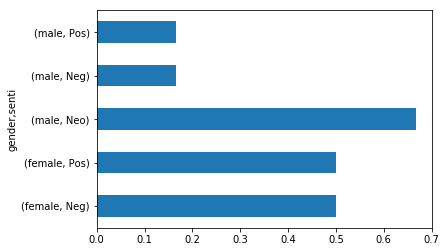

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt

#水平展示
df.groupby('gender').senti.value_counts(normalize=True).plot(kind='barh')

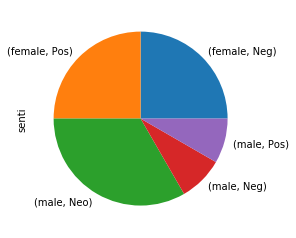

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

df.groupby('gender').senti.value_counts(normalize=True).plot(kind='pie')